In [72]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import Audio
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 12})

In [73]:
file_path_music = "glockenspiel.wav" # import audio
audio , audio_rate = librosa.load(file_path_music, sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
print("Audio",[len(audio),audio_rate])


Audio [262144, 44100]


In [74]:
print("Original audio")
Audio(file_path_music)

Original audio


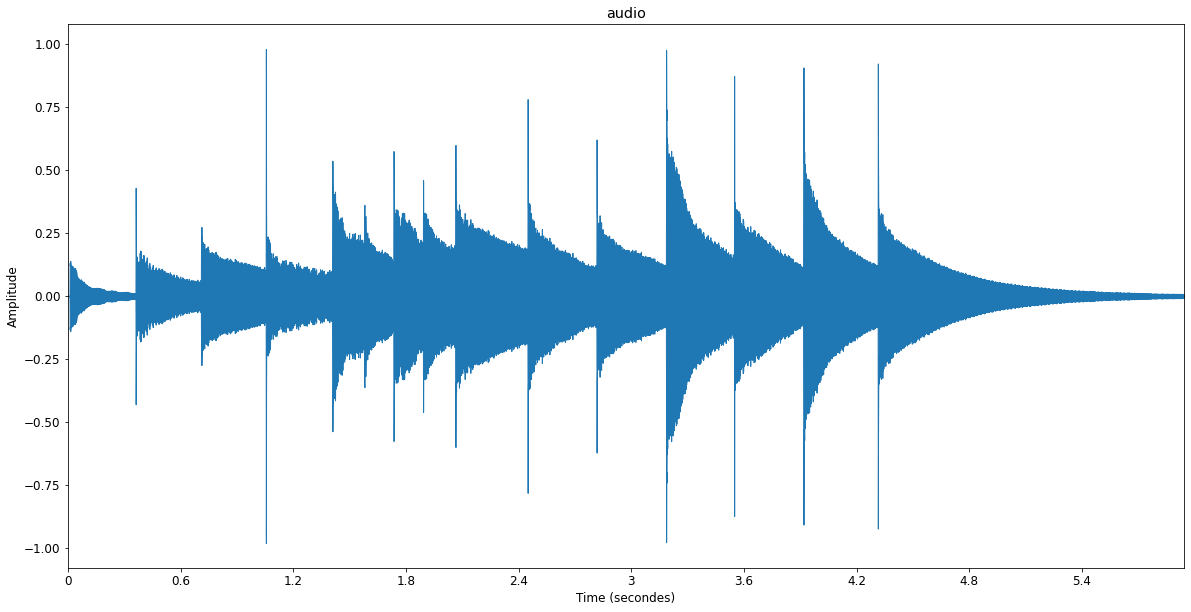

In [75]:
    librosa.display.waveplot(y = audio, sr = audio_rate) 
    plt.xlabel("Time (secondes)")
    plt.ylabel("Amplitude")
    plt.title("audio") 
plt.show()

# Useful fonction 

In [76]:
def SNR(x, y):
    """
    compute SNR of y, using x as reference clean signal
    """
    snr = 10*np.log10(np.sum(x**2)/np.sum((x-y)**2))
    snr = min(snr, 80)  # define 80dB as "perfect" signal (to avoid inf)
    return snr
def Clipping_signal(x, SNR_target):
    """
    %  Clipping a signal at a given SNR level, using bisection method.
    %  This method should be precise up to +/- 0.001 dB
    """
    ClippingLevel1 = 0;
    ClippingLevel2 = max(abs(x));
    SNRtmp = float("inf");
    it = 0;
    # Search between ClippingLevel1 and ClippingLevel2:
    while abs(SNRtmp-SNR_target) > 0.001 and it < 20:
        it = it + 1
        ClippingLevel = (ClippingLevel1+ClippingLevel2)/2
        y = np.maximum(np.minimum(x,ClippingLevel),-ClippingLevel)  # clip signal
        SNRtmp = SNR(x,y)  # check SNR

        # update search interval
        if SNRtmp < SNR_target:
            ClippingLevel1 = ClippingLevel
        else:
            ClippingLevel2 = ClippingLevel
    return y, ClippingLevel

In [95]:
clipped_signal=Clipping_signal(audio, 10)

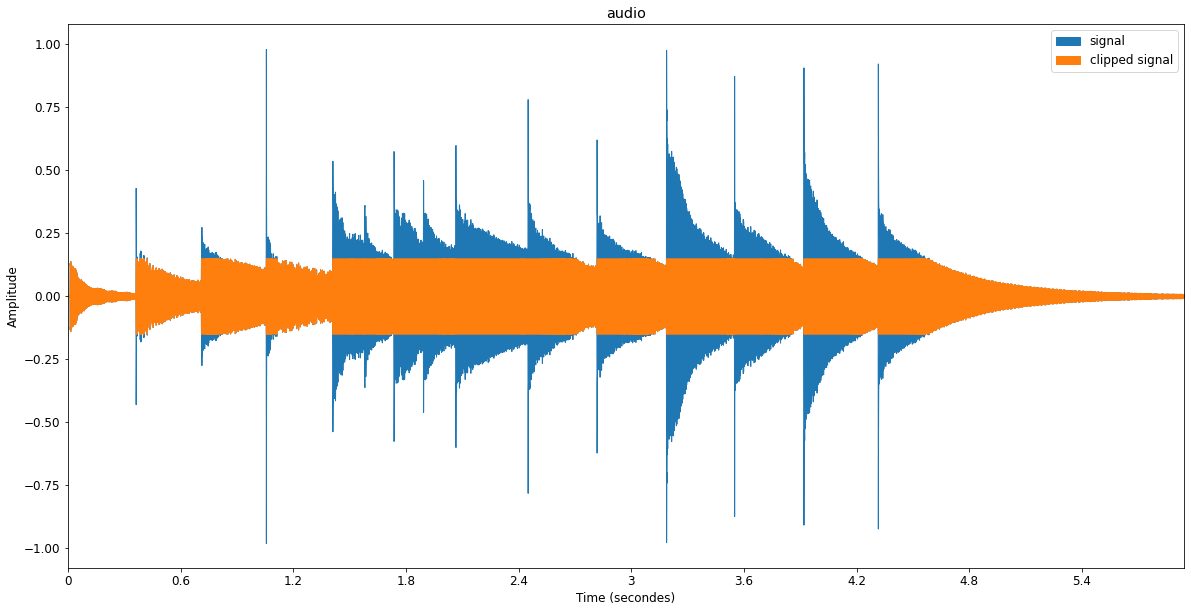

In [101]:
    librosa.display.waveplot(y = audio, sr = audio_rate, label='signal') 
    librosa.display.waveplot(y = clipped_signal[0], sr = audio_rate, label='clipped signal') 
    plt.xlabel("Time (secondes)")
    plt.ylabel("Amplitude")
    plt.title("audio") 
    plt.legend()
plt.show()